# Implement Linear Regression

This will be helpful to further familiarize yourself with Numpy and how Linear Regression actually works.
If you face any problems, feel free to contact us in Slack

In [22]:
#imports
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load the boston house dataset

In [23]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
# boston.head()

### Train test split

In [24]:
X = boston.drop('MEDV', axis=1) 
Y = boston['MEDV']   

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Apply feature scaling on the data

In [25]:
# Code here
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_test = scaler.transform( X_test )

### Define the Parameters (W or Θ) here
Create an appropriate shape numpy array for W

In [26]:
W = np.random.uniform(low=0.5, high=1.5, size=(X_train.shape[1]+1) )
alpha =  0.1
W.shape

(14,)

In [27]:
W

array([1.06634757, 0.80622026, 0.75091837, 1.02077067, 1.07691549,
       1.44018786, 0.58314498, 0.81086285, 1.32910733, 1.09872812,
       1.20917188, 0.69831477, 0.63008086, 1.34129939])

In [28]:
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
X_train.shape

(404, 14)

In [29]:
# X_train[0]

# Linear regression: Using normal equation
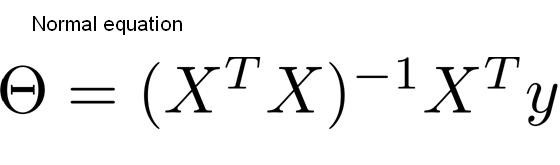

In [30]:
# Solve using normal equation
W_neqn = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)

In [31]:
W_neqn

array([ 2.26467822e+01, -1.13502719e+00,  1.15814527e+00,  7.37057333e-03,
        6.87096346e-01, -1.82837001e+00,  2.36271879e+00,  3.16653780e-02,
       -3.06632775e+00,  3.16621482e+00, -2.21457852e+00, -2.08600876e+00,
        1.04495110e+00, -4.17627077e+00])

### Get predictions

In [32]:
def predict(X, W):
    return np.dot(W,X.T)

### Define the MSE loss function
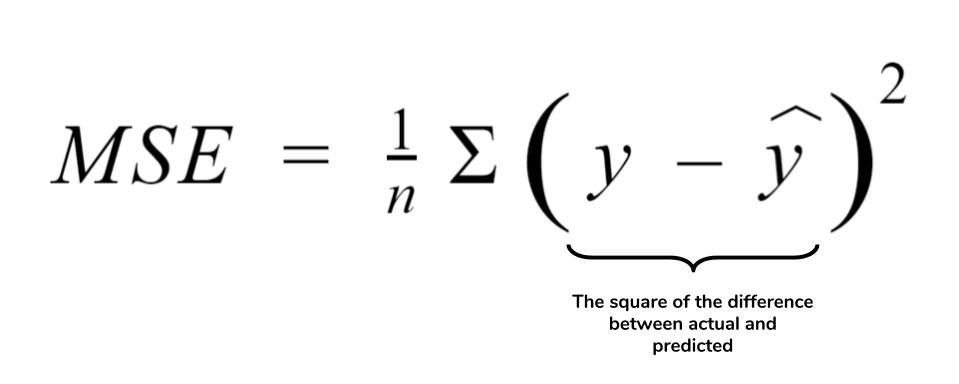

In [33]:
# Code here
def mse(y, yhat):
    
    N = yhat.shape[0]

    error = np.sum((yhat - y)**2)/(N)

    return error

In [34]:
print(X_train.shape)
print(W.shape)

(404, 14)
(14,)


In [35]:
yhat = predict(X_train, W)
# print(yhat)

In [14]:
loss = mse(Y_train, yhat)
print(loss)

603.3973300748937


# Solve using Gradient Descent

### Calculate gradient

In [15]:
def compute_gradient(X, y, W):
    # Code here
    
    m = X.shape[0]
    
    h = predict(X, W)
    loss = h - y
    
    # Gradient Calculation
    dW = X.T.dot(loss) / m
    
    return dW

### Update Weights

In [16]:
# Code here
W = W - alpha*compute_gradient(X_train, Y_train, W)


### Repeat for N- Iterations

In [17]:
N = 100
losses = []
for i in range(N):
    # Predict
    yhat = predict(X_train, W)
    
    # Calculate Loss
    loss = mse(Y_train, yhat)
    
    # Compute gradient dL/dW
    dW = compute_gradient(X_train, Y_train, W)

    # Update the weights
    W = W - alpha*compute_gradient(X_train, Y_train, W)
    
    losses.append(loss)


In [18]:
# losses

### Plot the loss curve

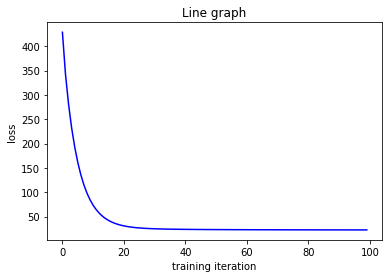

In [19]:
# Loss curve here
import matplotlib.pyplot as plt

x = np.arange(100)
 
# plotting
plt.title("Line graph")
plt.xlabel("training iteration")
plt.ylabel("loss")
plt.plot(x,losses, color ="blue")
plt.show()

# BONUS: Create a Linear Regression Class [OPTIONAL]
Create a Sklearn-like API

In [20]:
class LinearRegression:
    # You can define additional functions as per your need
    def __init__(self, alpha=0.001, n_iter=1000):
        self.W = None
        self.alpha = alpha
        self.n_iter = n_iter
        ...

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

In [21]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
loss = mse(y, predictions)

### Compare loss with Sklearn's implementation

In [ ]:
from sklearn.linear_model import LinearRegression as SKLinearRegression

In [ ]:
sklearn_model = SKLinearRegression()
sklearn_model.fit(X, y)
sklearn_predictions = sklearn_model.predict(X)
sklearn_loss = mse(y, sklearn_predictions)

In [ ]:
print(f"Sklearn: {sklearn_loss}")
print(f"Ours: {loss}")